Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [ ]:
dataset = pd.read_csv('/content/TSLA.csv')

In [ ]:
dataset.head()

,Open,High,Low,Close,Volume,Day,Month,Year,Is_Quarter_End,Open-Close,Low-High,Target
0,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,-4.889999,-7.459999,0
1,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,1.960001,-7.120001,0
2,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,3.040001,-5.650000,0
3,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,3.799999,-4.390001,0
4,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,3.889999,-4.170000,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [ ]:
dataset.shape

(2416, 7)

In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


Exploratory Data Analysis

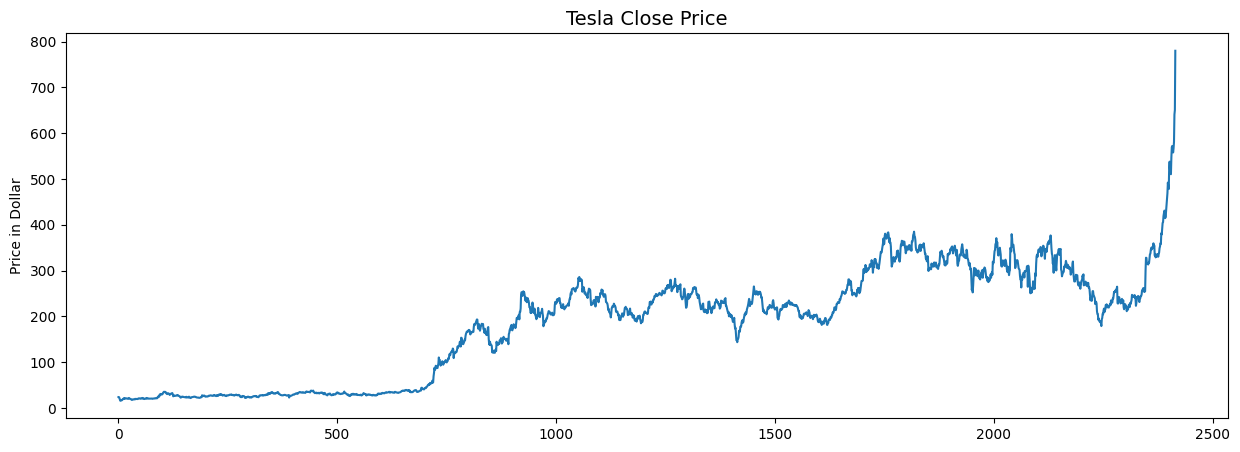

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(dataset['Close'])
plt.title('Tesla Close Price', fontsize = 14)
plt.ylabel('Price in Dollar')
plt.show()

In [ ]:
dataset[dataset['Close'] == dataset['Adj Close']].shape

(2416, 7)

In [ ]:
dataset = dataset.drop(['Adj Close'], axis = 1)

<ipython-input-158-fae43118059f>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)
<ipython-input-158-fae43118059f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])
<ipython-input-158-fae43118059f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code t

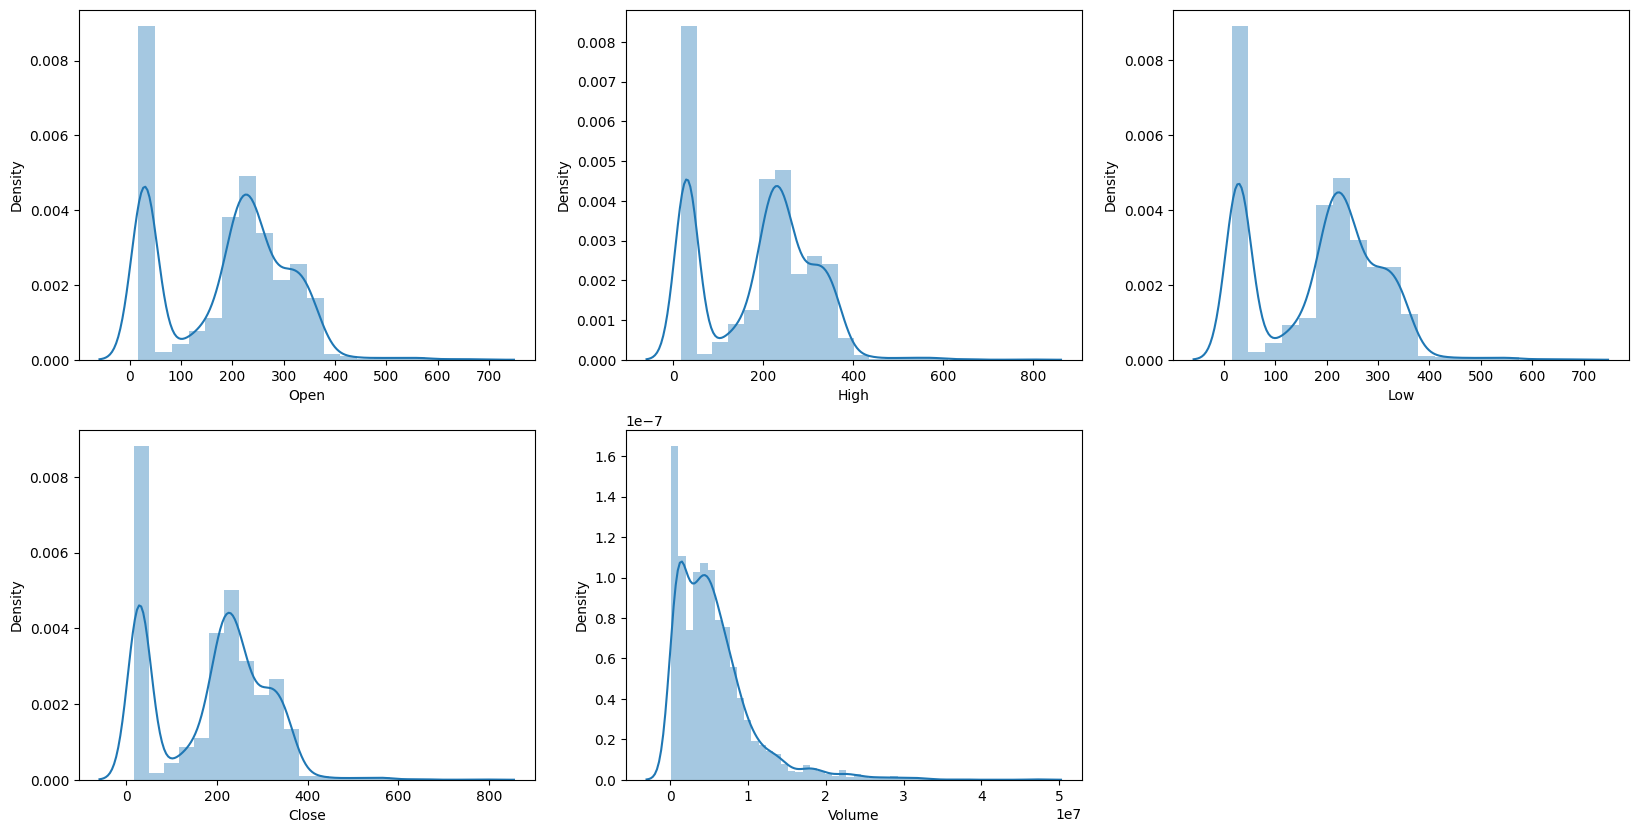

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize = (20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.distplot(dataset[col])
plt.show()

<ipython-input-130-f54efad7657d>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)


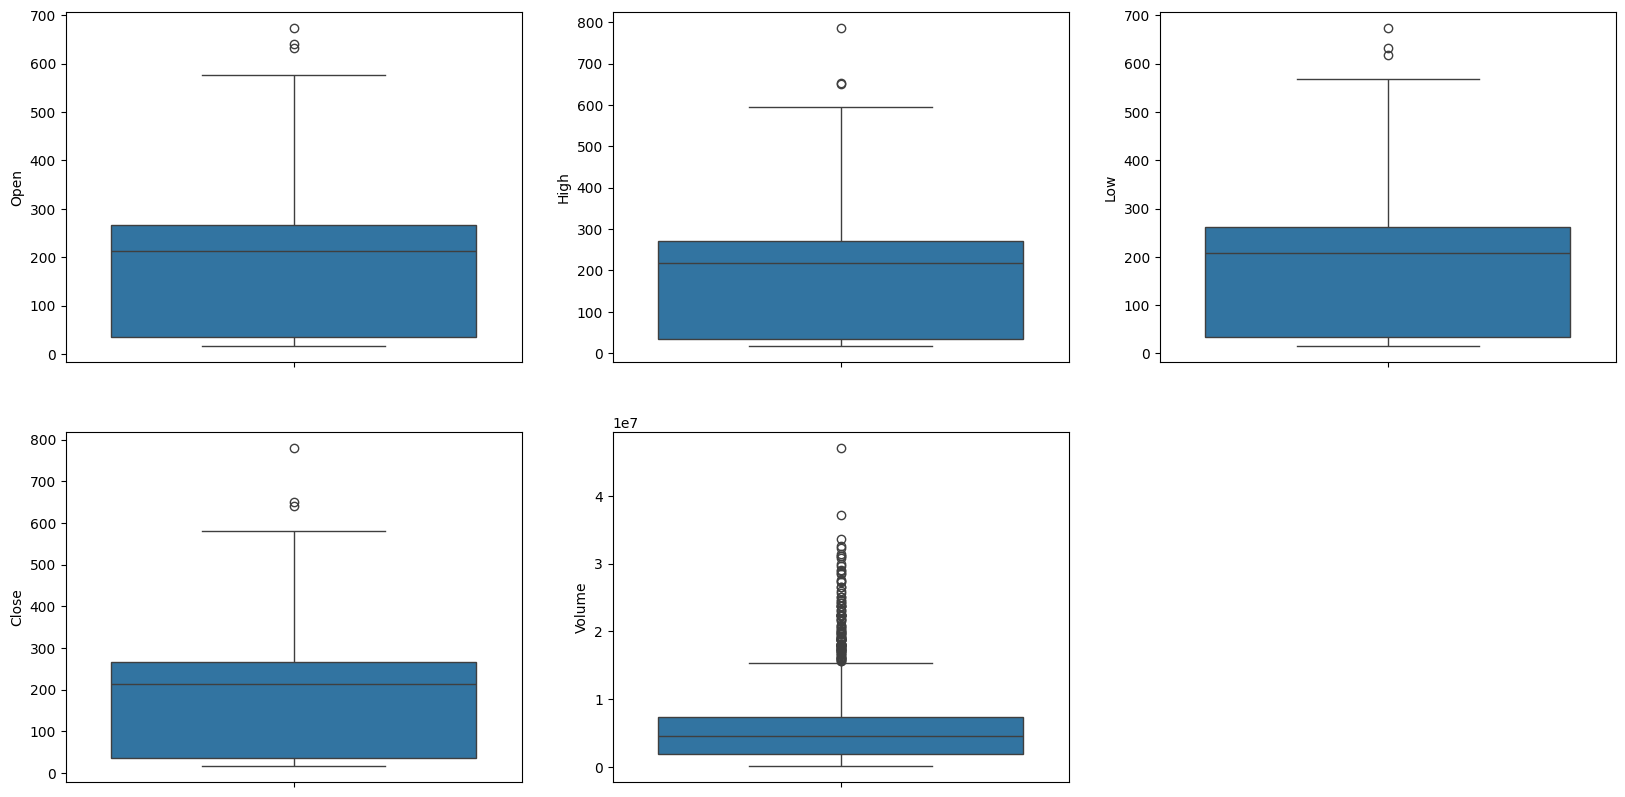

In [ ]:
plt.subplots(figsize = (20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(dataset[col])
plt.show()

Feature Engineering

In [ ]:
split_date = dataset['Date'].str.split('-', expand = True)
dataset['Day'] = split_date[2].astype('int')
dataset['Month'] = split_date[1].astype('int')
dataset['Year'] = split_date[0].astype('int')
dataset.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [ ]:
dataset['Is_Quarter_End'] = np.where(dataset['Month']%3 == 0, 1, 0)
dataset.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year,Is_Quarter_End
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


<ipython-input-155-6789956ed920>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


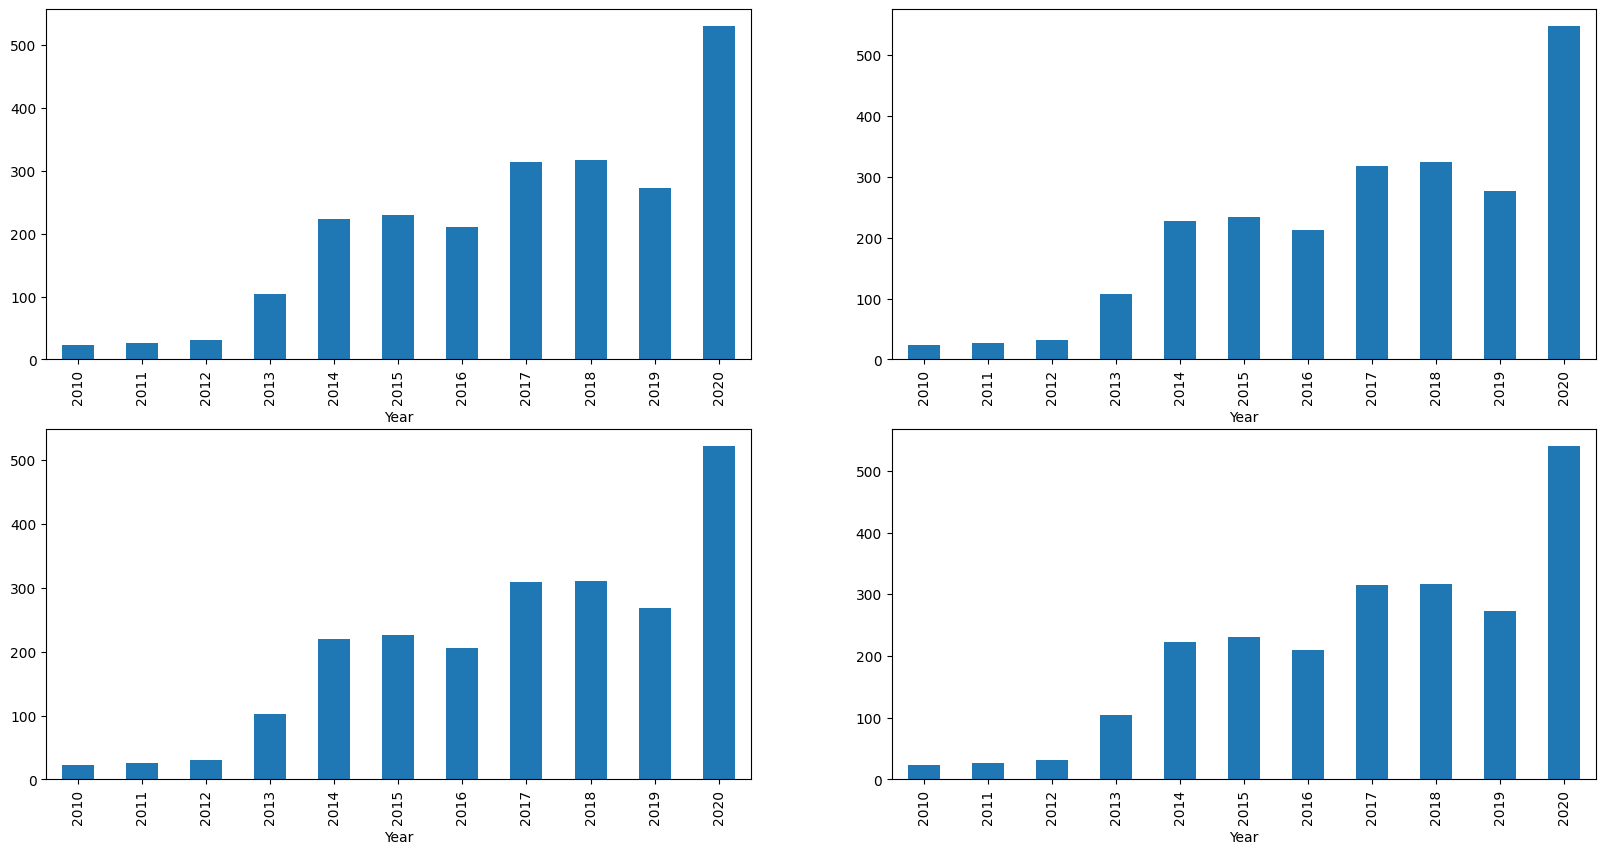

In [ ]:
data_grouped = dataset.groupby(['Year']).mean(numeric_only = True)
plt.subplots(figsize = (20, 10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    data_grouped[col].plot.bar(label = True)
plt.show()

In [ ]:
dataset.groupby('Is_Quarter_End').mean(numeric_only = True)

,Open,High,Low,Close,Volume,Day,Month,Year
Is_Quarter_End,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,5.767062e+06,15.710396,6.173886,2014.816213
1,187.071200,190.232700,183.860262,187.047163,5.180154e+06,15.825000,7.597500,2014.697500


In [ ]:
dataset['Open-Close'] = dataset['Open'] - dataset['Close']
dataset['Low-High'] = dataset['Low'] - dataset['High']

In [ ]:
dataset['Target'] = np.where(dataset['Close'].shift(-1) > dataset['Close'],1, 0)

([<matplotlib.patches.Wedge at 0x7b1612d025f0>,
 [Text(-0.038611867884826935, 1.0993221200623795, '0'),
  Text(0.038611970810791645, -1.0993221164472708, '1')],
 [Text(-0.021061018846269233, 0.5996302473067524, '51.1%'),
  Text(0.021061074987704532, -0.5996302453348749, '48.9%')])

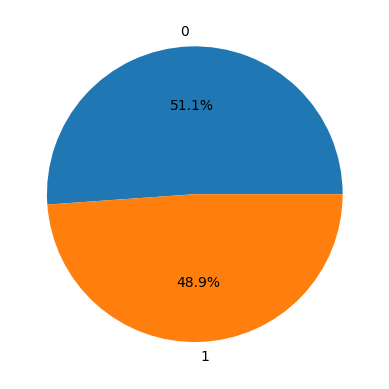

In [ ]:
plt.pie(dataset['Target'].value_counts().values, labels = [0, 1], autopct = '%1.1f%%')

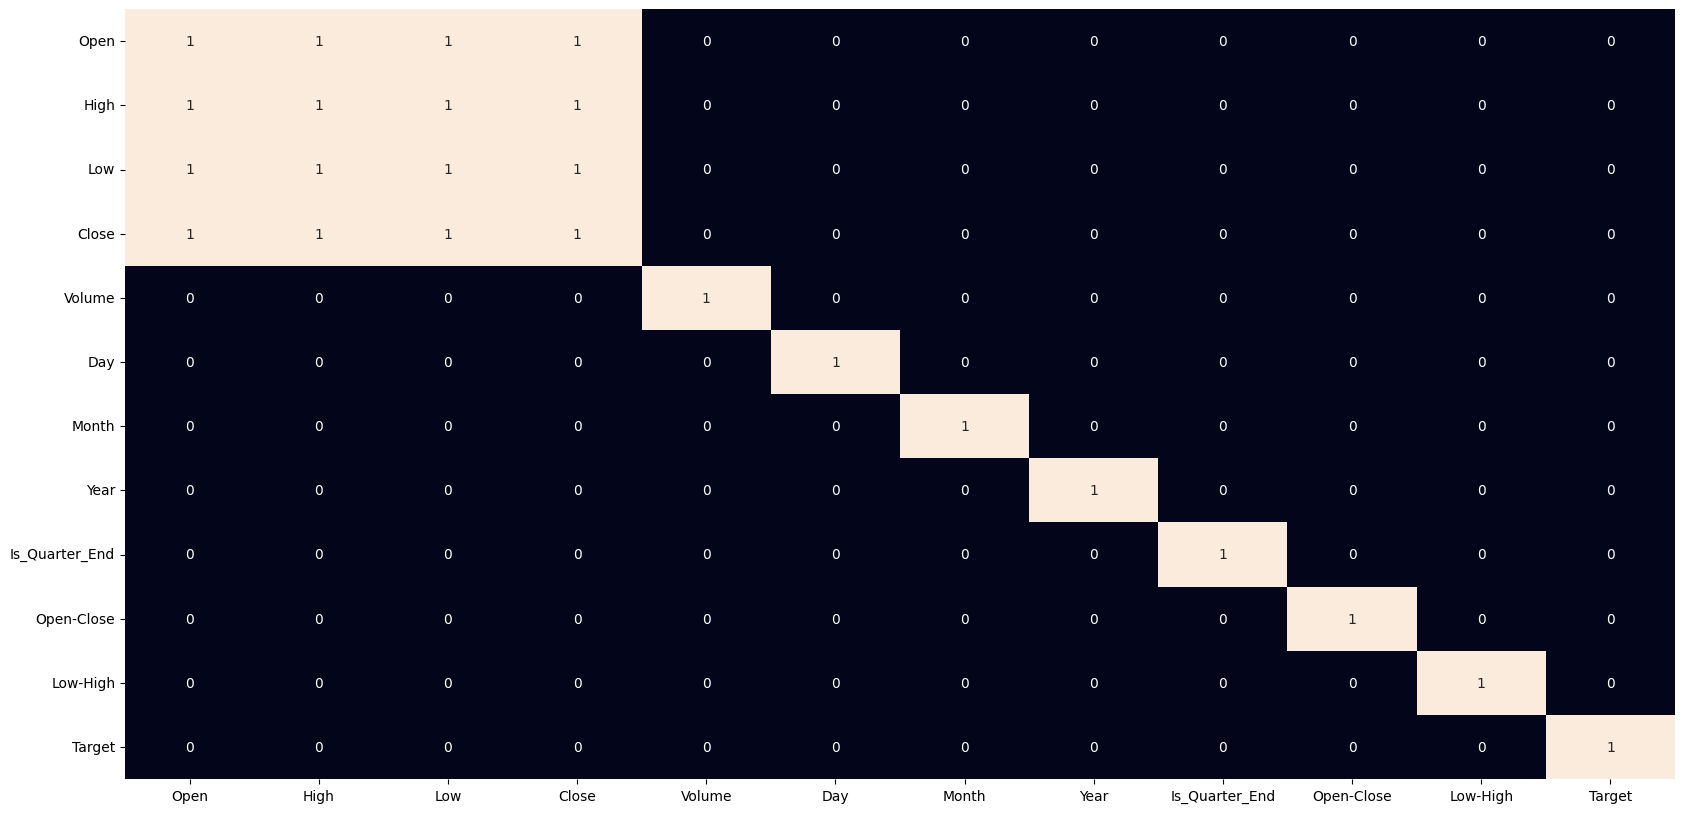

In [ ]:
plt.figure(figsize = (20, 10))
dataset = dataset.drop(['Date'], axis = 1)
sns.heatmap(dataset.corr() > 0.9, annot = True, cbar = False)
plt.show()

Splitting the Data

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1932, 11)
(484, 11)


Model Development

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [ ]:
models = [GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators = 200), LogisticRegression()]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f"{models[i]} training accuracy: {accuracy_score((models[i].predict(X_train)), y_train)}")
    print(f"{models[i]} testing accuracy: {accuracy_score((models[i].predict(X_test)), y_test)}")
    print(f"{models[i]} training roc accuracy: {roc_auc_score((models[i].predict(X_train)), y_train)}")
    print(f"{models[i]} testing roc accuracy: {roc_auc_score((models[i].predict(X_test)), y_test)}")
    print()

GaussianNB() training accuracy: 0.5170807453416149
GaussianNB() testing accuracy: 0.5041322314049587
GaussianNB() training roc accuracy: 0.5131504034960955
GaussianNB() testing roc accuracy: 0.509659585974822

DecisionTreeClassifier() training accuracy: 1.0
DecisionTreeClassifier() testing accuracy: 0.4628099173553719
DecisionTreeClassifier() training roc accuracy: 1.0
DecisionTreeClassifier() testing roc accuracy: 0.4628353538635159

RandomForestClassifier(n_estimators=200) training accuracy: 1.0
RandomForestClassifier(n_estimators=200) testing accuracy: 0.5103305785123967
RandomForestClassifier(n_estimators=200) training roc accuracy: 1.0
RandomForestClassifier(n_estimators=200) testing roc accuracy: 0.5103305785123967

LogisticRegression() training accuracy: 0.5201863354037267
LogisticRegression() testing accuracy: 0.5041322314049587
LogisticRegression() training roc accuracy: 0.5175108838366389
LogisticRegression() testing roc accuracy: 0.507937721377061



**Before feature engineering**

GaussianNB() training accuracy: 0.5062111801242236
GaussianNB() testing accuracy: 0.4896694214876033
GaussianNB() training roc accuracy: 0.4863762670296663
GaussianNB() testing roc accuracy: 0.4765437788018433

DecisionTreeClassifier() training accuracy: 1.0
DecisionTreeClassifier() testing accuracy: 0.512396694214876
DecisionTreeClassifier() training roc accuracy: 1.0
DecisionTreeClassifier() testing roc accuracy: 0.5125730643308936

RandomForestClassifier(n_estimators=200) training accuracy: 1.0
RandomForestClassifier(n_estimators=200) testing accuracy: 0.518595041322314
RandomForestClassifier(n_estimators=200) training roc accuracy: 1.0
RandomForestClassifier(n_estimators=200) testing roc accuracy: 0.5186342829814852

LogisticRegression() training accuracy: 0.5181159420289855
LogisticRegression() testing accuracy: 0.493801652892562
LogisticRegression() training roc accuracy: 0.5306516289014734


**after feature engineering**

GaussianNB() training accuracy: 0.5170807453416149
GaussianNB() testing accuracy: 0.5041322314049587
GaussianNB() training roc accuracy: 0.5131504034960955
GaussianNB() testing roc accuracy: 0.509659585974822

DecisionTreeClassifier() training accuracy: 1.0
DecisionTreeClassifier() testing accuracy: 0.4628099173553719
DecisionTreeClassifier() training roc accuracy: 1.0
DecisionTreeClassifier() testing roc accuracy: 0.4628353538635159

RandomForestClassifier(n_estimators=200) training accuracy: 1.0
RandomForestClassifier(n_estimators=200) testing accuracy: 0.5103305785123967
RandomForestClassifier(n_estimators=200) training roc accuracy: 1.0
RandomForestClassifier(n_estimators=200) testing roc accuracy: 0.5103305785123967

LogisticRegression() training accuracy: 0.5201863354037267
LogisticRegression() testing accuracy: 0.5041322314049587
LogisticRegression() training roc accuracy: 0.5175108838366389
LogisticRegression() testing roc accuracy: 0.507937721377061